# Library page views interactive

This is another look at the small libraries pageview data, but this time combining multiple visualizations linked by interactive selections!

In [1]:
import pandas as pd
import altair as alt
from altair import datum

# avoid MaxRowsError
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Read in library web site page views data

and change the timestamp column to `datetime` type

In [2]:
pageviews = pd.read_csv('data/pageviews_2012_small.csv')
pageviews['timestamp'] = pd.to_datetime(pageviews.timestamp)

pageviews.head()

,timestamp,visitors,city,region,country,longitude,latitude,lcc_description
0,2012-01-01 16:00:00,1,Montreal,Quebec,Canada,-73.5542,45.5089,Military Science
1,2012-01-01 13:00:00,1,Durham,North Carolina,United States,-78.8986,35.9940,History Of The Americas
2,2012-01-01 10:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences
3,2012-01-01 18:00:00,1,Plymouth,England,United Kingdom,-4.1427,50.3704,NaN
4,2012-01-01 09:00:00,1,Edinburgh,Scotland,United Kingdom,-3.1875,55.9502,Social Sciences


## Simple interactive version of any plot

**Finish any visualization with `.interactive()`**

- Simple zooming with scroll wheel
- Click and drag to pan
- Double-tap to reset zoom range

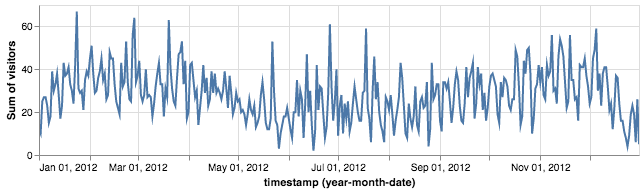

In [3]:
alt.Chart(pageviews).mark_line().encode(
    x = 'yearmonthdate(timestamp):T',
    y = 'sum(visitors):Q'
).properties(
    width=600,
    height=150
).interactive()

## Filtering bar chart with time interval selection

**The most exciting part of interactivity comes with defining selections that get shared between multiple plots.** 

Here we create an "interval" selection that only goes in the X direction. 

- The selection is active in the line plot
- It's used as a filter in the bar chart

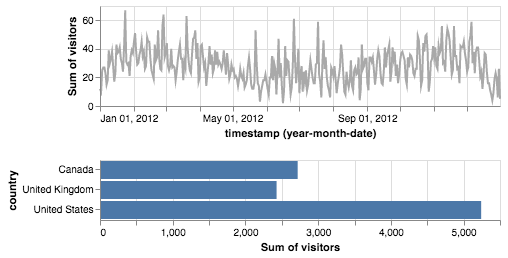

In [4]:
interval = alt.selection(type='interval', encodings=['x'])

timeline = alt.Chart(pageviews).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q',
    color = alt.value("darkgray")
).properties(
    height = 100
).add_selection(
    interval
)

bar = alt.Chart(pageviews).mark_bar().encode(
    x = 'sum(visitors):Q',
    y = 'country:N'
).transform_filter(
    interval
)

timeline & bar

## Bars filter timeline with multi-selection

With selection `type='single'` you can select a single bar (or point, or whatever you're using) and use it to filter the other plot.

With `type='multi'` you can hold down shift and select multiple bars and use the combination to filter the timeline.

**Note that we've included conditional color on the bar chart. There is a bug in vega-lite that doesn't allow the same conditional color on the time axis above.** 

*Notice how different subject areas have different peak times of year for views!*

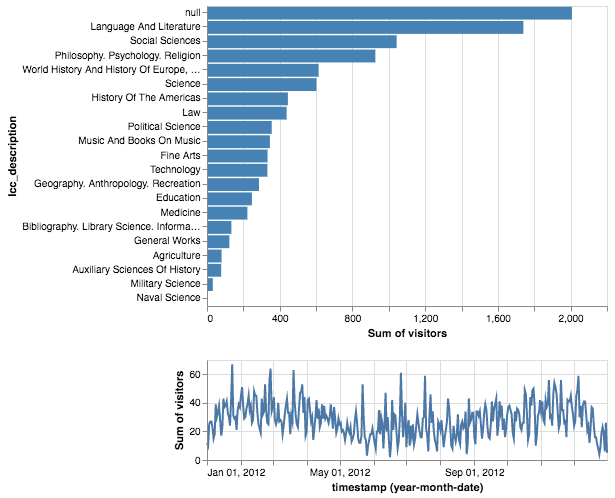

In [5]:
bar_select = alt.selection(type='multi', empty='all', fields=['lcc_description'])

bar = alt.Chart(pageviews).mark_bar().encode(
    x = 'sum(visitors)',
    y = alt.Y('lcc_description',
            sort=alt.EncodingSortField(
                field="visitors",
                op="sum",
                order="descending")
    ),
    color=alt.condition(bar_select, alt.value("steelblue"), alt.value("lightgray")),
).properties(
    height = 300
).add_selection(
    bar_select
)

timeline = alt.Chart(pageviews).mark_line().encode(
    x = alt.X('timestamp:T', timeUnit='yearmonthdate'),
    y = 'sum(visitors):Q'
).transform_filter(
    bar_select
).properties(
    height = 100
)

bar & timeline